In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS

# Get the CSV file from google drive

In [2]:
url='https://drive.google.com/file/d/1QuvhMiZLka18ZXnx8o1P5C8Cf5oHCgjL/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_movies_orig = pd.read_csv(url)

In [3]:
df_movies = df_movies_orig.copy()

In [4]:
df_movies.head()

,Unnamed: 0,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,...,vote_count,return,belongs_to_collection_name,genres_name,production_companies_name,production_countries_name,spoken_languages_name,release_year,cast,director
0,0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,12.451801,Toy Story Collection,"['Animation', 'Comedy', 'Family', '', '', '', ...","['Pixar Animation Studios', '', '', '', '', ''...","['United States of America', '', '', '', '', '...","['English', '', '', '', '', '', '', '', '', ''...",1995,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter
1,1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,...,2413.0,4.043035,NaN,"['Adventure', 'Fantasy', 'Family', '', '', '',...","['TriStar Pictures', 'Teitler Film', 'Intersco...","['United States of America', '', '', '', '', '...","['English', 'Français', '', '', '', '', '', ''...",1995,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Larry J. Franco
2,2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,...,92.0,0.000000,Grumpy Old Men Collection,"['Romance', 'Comedy', '', '', '', '', '', '']","['Warner Bros.', 'Lancaster Gate', '', '', '',...","['United States of America', '', '', '', '', '...","['English', '', '', '', '', '', '', '', '', ''...",1995,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch
3,3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,...,34.0,5.090760,NaN,"['Comedy', 'Drama', 'Romance', '', '', '', '',...","['Twentieth Century Fox Film Corporation', '',...","['United States of America', '', '', '', '', '...","['English', '', '', '', '', '', '', '', '', ''...",1995,"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker
4,4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,...,173.0,0.000000,Father of the Bride Collection,"['Comedy', '', '', '', '', '', '', '']","['Sandollar Productions', 'Touchstone Pictures...","['United States of America', '', '', '', '', '...","['English', '', '', '', '', '', '', '', '', ''...",1995,"['Steve Martin', 'Diane Keaton', 'Martin Short...",Alan Silvestri


In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  45345 non-null  int64  
 1   budget                      45345 non-null  float64
 2   id                          45345 non-null  int64  
 3   original_language           45334 non-null  object 
 4   overview                    44404 non-null  object 
 5   popularity                  45345 non-null  float64
 6   release_date                45345 non-null  object 
 7   revenue                     45345 non-null  float64
 8   runtime                     45099 non-null  float64
 9   status                      45265 non-null  object 
 10  title                       45345 non-null  object 
 11  vote_average                45345 non-null  float64
 12  vote_count                  45345 non-null  float64
 13  return                      453

In [6]:
drop_columns = ['Unnamed: 0', 'id', 'original_language', 'overview', 'runtime', 'spoken_languages_name', 'status', 
                'belongs_to_collection_name', 'production_companies_name', 'production_countries_name',
                'spoken_languages_name']
df_movies.drop(columns=drop_columns, axis=1, inplace=True)

In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        45345 non-null  float64
 1   popularity    45345 non-null  float64
 2   release_date  45345 non-null  object 
 3   revenue       45345 non-null  float64
 4   title         45345 non-null  object 
 5   vote_average  45345 non-null  float64
 6   vote_count    45345 non-null  float64
 7   return        45345 non-null  float64
 8   genres_name   45345 non-null  object 
 9   release_year  45345 non-null  int64  
 10  cast          45345 non-null  object 
 11  director      45345 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 4.2+ MB


In [8]:
df_movies.describe()

,budget,popularity,revenue,vote_average,vote_count,return,release_year
count,4.534500e+04,45345.000000,4.534500e+04,45345.000000,45345.000000,4.534500e+04,45345.000000
mean,4.232673e+06,2.926248,1.123390e+07,5.624320,110.137722,6.604937e+02,1991.882280
std,1.744391e+07,6.011023,6.441058e+07,1.915178,491.904428,7.471882e+04,24.053016
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1874.000000
25%,0.000000e+00,0.388826,0.000000e+00,5.000000,3.000000,0.000000e+00,1978.000000
50%,0.000000e+00,1.130269,0.000000e+00,6.000000,10.000000,0.000000e+00,2001.000000
75%,0.000000e+00,3.689610,0.000000e+00,6.800000,34.000000,0.000000e+00,2010.000000
max,3.800000e+08,547.488298,2.787965e+09,10.000000,14075.000000,1.239638e+07,2020.000000


## Remove characters form `genres_name` column

In [9]:
df_movies['genres_name'] = df_movies['genres_name'].apply(lambda x: x.strip("[]").replace("'", '').replace(",", '').strip())

## Rename empty field to NoData

In [10]:
empty_genre_list = df_movies[df_movies['genres_name'] == ''].index.values

In [11]:
for index in empty_genre_list:
    df_movies['genres_name'].iloc[index] = 'NoData'

/tmp/ipykernel_352086/2864831784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['genres_name'].iloc[index] = 'NoData'


## Expand `genres_name` column into multiple columns

In [12]:
df_aux = df_movies['genres_name'].str.split(' ', expand=True)

In [13]:
df_aux.head()

,0,1,2,3,4,5,6,7,8
0,Animation,Comedy,Family,None,None,None,None,None,None
1,Adventure,Fantasy,Family,None,None,None,None,None,None
2,Romance,Comedy,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None


## Get a list of unique genre

In [14]:
columns_list = df_aux.columns.values.tolist()
genre_list = [df_aux[column].unique() for column in columns_list]
flat_list = [item for sublist in genre_list for item in sublist]
unique_list = set(flat_list)
unique_list

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Fiction',
 'Foreign',
 'History',
 'Horror',
 'Movie',
 'Music',
 'Mystery',
 'NoData',
 None,
 'Romance',
 'Science',
 'TV',
 'Thriller',
 'War',
 'Western'}

## Remove None column

In [15]:
unique_list.remove(None)

## Create a new dataframe with all the genre as a column

In [16]:
df_title = df_movies[['title', 'genres_name', 'popularity', 'vote_average']]

## One Hot Encoder dataframe

In [17]:
for element in unique_list:
    df_title.loc[:, element] = 0
    df_title.loc[df_title['genres_name'].str.contains(element), element] = 1

/tmp/ipykernel_352086/3590848685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title.loc[:, element] = 0
/tmp/ipykernel_352086/3590848685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title.loc[:, element] = 0
/tmp/ipykernel_352086/3590848685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [18]:
df_title.head()

,title,genres_name,popularity,vote_average,Western,Drama,History,Comedy,Animation,Mystery,...,TV,Crime,Documentary,Action,Romance,Fantasy,Science,Fiction,Adventure,Movie
0,Toy Story,Animation Comedy Family,21.946943,7.7,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji,Adventure Fantasy Family,17.015539,6.9,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,Grumpier Old Men,Romance Comedy,11.712900,6.5,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Waiting to Exhale,Comedy Drama Romance,3.859495,6.1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Father of the Bride Part II,Comedy,8.387519,5.7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_title.drop(columns='genres_name', axis=1, inplace=True)

## Create a word cloud

In [20]:
title = df_title['title'].to_list()

In [21]:
title_word = [word.split(' ') for word in title]

In [22]:
title_word = [word for word_list in title_word for word in word_list]

In [23]:
token0 = []
for word in title_word:
  if len(word) >= 3:
    token0.append(word.lower())

In [24]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

a=set(stopwords.words('english'))
token1 = [word for word in token0 if word not in a]

[nltk_data] Downloading package stopwords to /home/fede/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
from nltk.probability import FreqDist

fdist = FreqDist(token1)
fdist

FreqDist({'man': 639, 'love': 635, 'story': 392, 'night': 382, 'life': 377, 'last': 344, 'girl': 296, 'dead': 277, 'one': 270, 'day': 263, ...})

In [27]:
from PIL import Image
mask = np.array(Image.open(r'_src/assets/film.png'))

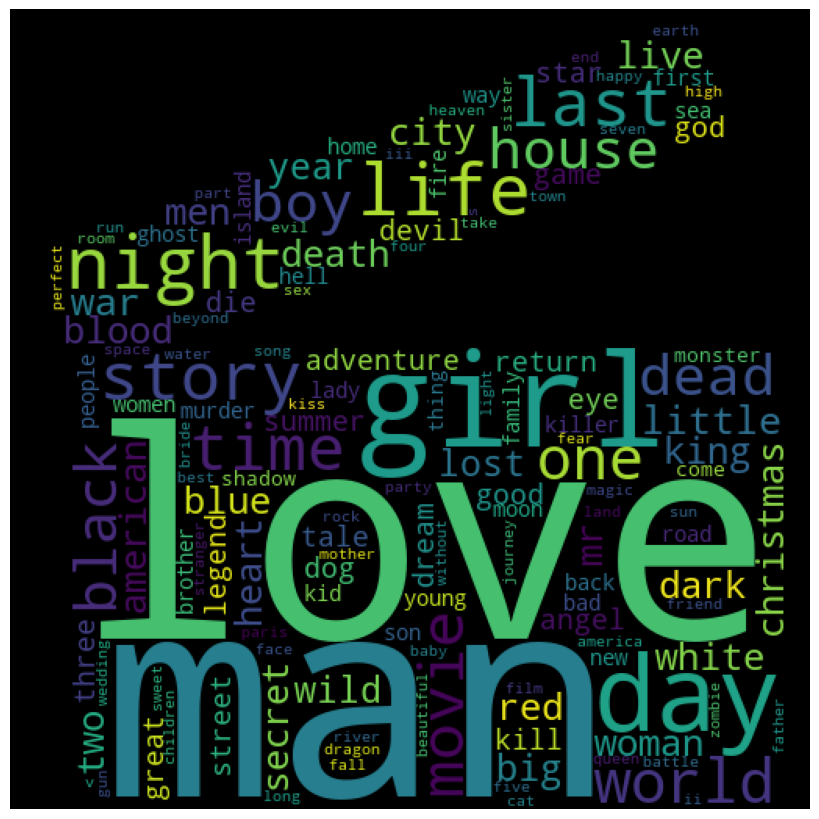

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(token1)

wordcloud = WordCloud(mask = mask, background_color="black", min_font_size=8, width = mask.shape[1],
               height = mask.shape[0]).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Create a new CSV file for the recomendation system

In [106]:
df_title.to_csv('ProcessedData/recommendation_system.csv')